<IPython.core.display.Javascript object>


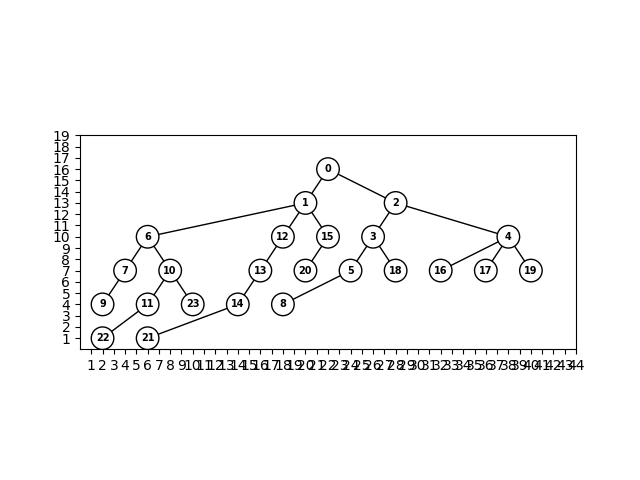

hola
hola
hola
hola


In [12]:
import numpy as np
import math 
import matplotlib.pyplot as plt
from matplotlib.table import table
from matplotlib.transforms import Bbox
from matplotlib.patches import Rectangle
from matplotlib.patches import Circle
from matplotlib.patches import Path
from matplotlib.patches import PathPatch
from matplotlib.widgets import TextBox
import ipywidgets as widgets 
from IPython.display import display, clear_output

%matplotlib nbagg 

def inter_points(rad,x1,y1,x2,y2): 
    phi = math.atan2(y2-y1, x2-x1)
    x = x1 + rad * math.cos(phi)
    y = y1 + rad * math.sin(phi)
    return (x,y)

class nodo: 
    def __init__(self,val): 
        self.val = val 
        self.children = [] 
        
class arbol:
    def __init__(self): 
        self.root = nodo(0)
        self.val_node = dict() 
        self.val_coord = dict()
        self.val_node[0] = self.root
    def agregar(self,padre,val):
        nuevo = nodo(val)
        self.val_node[val] = nuevo
        self.val_node[padre].children.append(nuevo)
        
    def aplastar_rec(self,node,ans,dpt): 
        for i in range(0,math.ceil(len(node.children)/2)): 
            self.aplastar_rec(node.children[i],ans,dpt+1)
        ans.append((node.val,dpt))
        for i in range(math.ceil(len(node.children)/2),len(node.children)):
            self.aplastar_rec(node.children[i],ans,dpt+1)
            
    def aplastar(self):
        ans = []
        self.aplastar_rec(self.root,ans,0)
        largest_d = -1
        for (v,d) in ans: 
            largest_d = max(largest_d,d)
        return (ans,largest_d)
    
    def dibujar(self,ax): 
        rad = 1.0 
        (l,largest_d) = self.aplastar()
        largest_x = [2 for i in range(0,largest_d+1)] 
        dy = 3
        #el radio del circulo 
        r = 2 
        tree_rep = dict()
        for (v,d) in l: 
            if(self.val_node[v].children): 
                ch_ind = math.ceil(len(self.val_node[v].children)/2) -1 
                child = self.val_node[v].children[ch_ind].val
                (cx,cy) = self.val_coord[child]
                x = max(cx + r,largest_x[d]) 
            else: 
                x = largest_x[d] 
            largest_x[d] = x + 2*r 
            y = largest_d*dy - d*dy + 1 
            self.val_coord[v] = (x,y)
            c = Circle((x,y),radius = rad,facecolor = 'white',edgecolor = 'black')
            tree_rep[v] = c 
            anot = ax.annotate(str(v), (x, y),color='black', weight='bold', fontsize=7, ha='center', va='center')
            ax.add_patch(c)
        #dibujar las líneas
        queue = []
        queue.append(0) 
        while(queue): 
            u = queue[0]
            queue.pop(0)
            for n in self.val_node[u].children: 
                v = n.val 
                xu,yu = tree_rep[u].get_center()
                xv,yv = tree_rep[v].get_center()
                linea = PathPatch(Path([inter_points(rad,xu,yu,xv,yv),inter_points(rad,xv,yv,xu,yu)]), facecolor='none', edgecolor='black')
                ax.add_patch(linea)
                queue.append(v)            

class cell: 
    def __init__(self): 
        self.ax = None
        self.maxim_x = None 
        self.maxim_y = None 
        self.st = None       
    def main(self): 
        fig, self.ax = plt.subplots()
        self.maxim_x = 10
        self.maxim_y = 20
        plt.xticks(range(1,self.maxim_x))
        plt.yticks(range(1,self.maxim_y))
        plt.gca().set_aspect('equal', adjustable='box')
        a = arbol(); 
        a.agregar(0,1)
        a.agregar(0,2)
        a.agregar(1,6)
        a.agregar(2,3)
        a.agregar(2,4)
        a.agregar(6,7)
        a.agregar(3,5)
        a.agregar(5,8)
        a.agregar(7,9)
        a.agregar(6,10)
        a.agregar(10,11)
        a.agregar(1,12)
        a.agregar(12,13)
        a.agregar(13,14)
        a.agregar(1,15)
        a.agregar(4,16)
        a.agregar(4,17)
        a.agregar(3,18)
        a.agregar(4,19)
        a.agregar(15,20)
        a.agregar(14,21)
        a.agregar(11,22)
        a.agregar(10,23)
        self.maxim_x = 45
        #self.maxim_y = 15
        plt.xticks(range(1,self.maxim_x))
        #plt.yticks(range(1,self.maxim_y))
        a.dibujar(self.ax)
        plt.show()
        self.button_config()
    def button_config(self): 
        button = widgets.Button(description='Siguiente')
        out = widgets.Output()
        button.on_click(self.on_button_clicked)
        # displaying button and its output together
        box = widgets.VBox([button,out])
        display(box)
    def on_button_clicked(self,_):
        #self.st.update() 
        print("hola")
        
c = cell(); 
c.main()